In [42]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
ExN50_dict = {}
for file in glob.glob("../outputs/trinity_stats/*/ExN50.stats"):
    ExN50_dict[file.split("/")[3].split("_")[1]] = pd.read_table(file)
ExN50_dict["kmer29cov1"]

,Ex,ExN50,num_transcripts
0,3,489,1
1,4,489,2
2,5,489,3
3,6,464,5
4,7,464,6
...,...,...,...
93,96,912,84053
94,97,882,95238
95,98,844,109997
96,99,766,136826


In [52]:
ExN50 = pd.DataFrame(columns=list(ExN50_dict.keys()))
ExN50["Ex"] = ExN50_dict["kmer21cov1"]["Ex"]
for i in ExN50_dict:
    ExN50[i] = ExN50_dict[i]["ExN50"]
ExN50 = pd.melt(ExN50, id_vars="Ex")
ExN50

,Ex,variable,value
0,1,kmer21cov1,209.0
1,2,kmer21cov1,209.0
2,3,kmer21cov1,3387.0
3,4,kmer21cov1,3387.0
4,5,kmer21cov1,1623.0
...,...,...,...
595,96,kmer25cov1,965.0
596,97,kmer25cov1,917.0
597,98,kmer25cov1,860.0
598,99,kmer25cov1,769.0


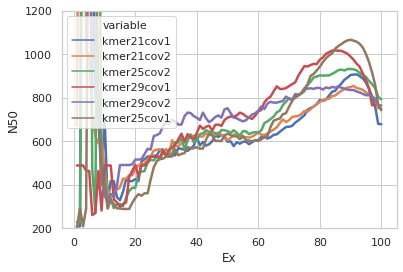

In [72]:
sns.set(style="whitegrid")
ax = sns.lineplot(data=ExN50, x="Ex", y="value", hue="variable", linewidth=2.5)
ax = (ax.set(ylim=(200,1200)))
plt.ylabel('N50')
plt.savefig('../vis/txm_ExN50', dpi=300, bbox_inches='tight')

In [78]:
#here i'm just trying to retrieve the mapping rates from the log files
for file in glob.glob("../outputs/trinity_stats/*/logs/salmon_quant.log"):
    with open(file) as f:
        print(f.read())

[2019-12-19 17:13:21.473] [jointLog] [info] Fragment incompatibility prior below threshold.  Incompatible fragments will be ignored.
[2019-12-19 17:13:21.473] [jointLog] [info] Usage of --validateMappings implies use of minScoreFraction. Since not explicitly specified, it is being set to 0.65
[2019-12-19 17:13:21.473] [jointLog] [info] Usage of --validateMappings, without --hardFilter implies use of range factorization. rangeFactorizationBins is being set to 4
[2019-12-19 17:13:21.473] [jointLog] [info] Usage of --validateMappings implies a default consensus slack of 0.2. Setting consensusSlack to 0.2.
[2019-12-19 17:13:21.473] [jointLog] [info] parsing read library format
[2019-12-19 17:13:21.473] [jointLog] [info] There is 1 library.
[2019-12-19 17:13:21.514] [jointLog] [info] Loading Quasi index
[2019-12-19 17:13:21.535] [jointLog] [info] Loading 32-bit quasi index
[2019-12-19 17:13:26.948] [jointLog] [info] done
[2019-12-19 17:13:26.948] [jointLog] [info] Index contained 163,284 ta